In [1]:
# notebook to illustrate text indexing and basic search

In [2]:
# following only used for development, reloads the modules with any code changes
%load_ext autoreload
%autoreload 2

# inline matplotlib charts
%matplotlib inline

In [3]:
# import our text mining toolkit
import text_mining_toolkit as tmt

In [4]:
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/recipes/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(directory_of_files="data_sets/mystery_corpus_01/txt/", text_filename_pattern="??.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/iraq_inquiry/txt/", text_filename_pattern="the-report*.txt")
#cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/clinton_emails/txt/", text_filename_pattern="C0*")
cr = tmt.corpus_reader.CorpusReader(content_directory="data_sets/shakespeare_macbeth/txt/", text_filename_pattern="macbeth_act_0?_scene_0?.txt")

content_directory =  data_sets/shakespeare_macbeth/txt/
text_filename_pattern =  macbeth_act_0?_scene_0?.txt
self.documents populated =  28


In [7]:
# first clear index
#tmt.index_search.delete_indices(cr.content_directory)

# for all documents in corpus
for document_name in cr.get_documents():
    #print("processing ", document_name)

    # get document text
    document_text = cr.get_text_by_document(document_name)

    # simplify whitespace (remove newlines)
    b = tmt.text_processing.simplify_whitespace(document_text)

    # only keep alphanumeric characters, removes punctuation
    c = tmt.text_processing.keep_alphanumeric(b)

    # make lowercase
    d = tmt.text_processing.to_lowercase(c)

    # split into words list
    dl = tmt.text_processing.split_text_into_words(d)
    
    # build n-grams
    #gl = tmt.word_processing.build_ngrams_from_words(dl,2)

    # remove stop words
    #el = tmt.word_processing.remove_stop_words(dl, "./stopwords/minimal-stop.txt")
    
    # update index
    tmt.index_search.create_wordcount_index_for_document(cr.content_directory, document_name, dl)
    pass


In [8]:
# merge document indices into a corpus index
tmt.index_search.merge_wordcount_indices_for_corpus(cr.content_directory)

saving corpus index ...  data_sets/shakespeare_macbeth/txt/index.wordcount


In [9]:
# create relevance index
tmt.index_search.calculate_relevance_index(cr.content_directory)

In [10]:
tmt.index_search.print_index(cr.content_directory)

wordcount_index_file  data_sets/shakespeare_macbeth/txt/index.wordcount
          macbeth_act_01_scene_01.txt  macbeth_act_01_scene_02.txt  \
                                  0.0                          0.0   
1                                 3.0                          0.0   
1murth                            0.0                          0.0   
2                                 2.0                          0.0   
2murth                            0.0                          0.0   
3                                 2.0                          0.0   
a                                 0.0                          7.0   
abhorred                          0.0                          0.0   
abide                             0.0                          0.0   
abiure                            0.0                          0.0   

                     ...               macbeth_act_05_scene_07.txt  \
                     ...                                       0.0   
1                

In [19]:
tmt.index_search.search_index(cr.content_directory, "king")

matching_documents macbeth_act_01_scene_02.txt    0.010196
macbeth_act_01_scene_03.txt    0.001888
macbeth_act_01_scene_04.txt    0.005312
macbeth_act_01_scene_05.txt    0.001810
macbeth_act_01_scene_06.txt    0.006776
macbeth_act_02_scene_03.txt    0.000605
macbeth_act_03_scene_01.txt    0.000935
macbeth_act_03_scene_02.txt    0.000807
macbeth_act_03_scene_06.txt    0.001803
macbeth_act_04_scene_01.txt    0.000627
macbeth_act_04_scene_03.txt    0.000759
macbeth_act_05_scene_08.txt    0.001636
Name: king, dtype: float64


[('macbeth_act_04_scene_01.txt', 0.00062718939340528827),
 ('macbeth_act_01_scene_05.txt', 0.0018097754356607284),
 ('macbeth_act_02_scene_03.txt', 0.00060470053069354489),
 ('macbeth_act_03_scene_06.txt', 0.0018026108456541542),
 ('macbeth_act_01_scene_03.txt', 0.0018878088706975095),
 ('macbeth_act_03_scene_02.txt', 0.00080733953831957318),
 ('macbeth_act_01_scene_04.txt', 0.0053122941621427918),
 ('macbeth_act_03_scene_01.txt', 0.000934604884261575),
 ('macbeth_act_04_scene_03.txt', 0.00075851990606736505),
 ('macbeth_act_01_scene_02.txt', 0.010196341961886358),
 ('macbeth_act_05_scene_08.txt', 0.0016355585474577561),
 ('macbeth_act_01_scene_06.txt', 0.0067758854108964182)]

In [20]:
words_by_relevance = tmt.index_search.get_words_by_relevance(cr.content_directory)
# 20 most common
words_by_relevance.most_common(20)

[('macb', 0.054290726546688539),
 ('macd', 0.035594645368231703),
 ('lady', 0.033369576532366031),
 ('king', 0.033152629487143058),
 ('your', 0.032823952970269257),
 ('rosse', 0.032265279863337777),
 ('macduffe', 0.032094212372463779),
 ('you', 0.031496581166274622),
 ('thou', 0.029339510996817971),
 ('banquo', 0.024926012293267519),
 ('thunder', 0.024654575595858041),
 ('when', 0.023867123466518966),
 ('thee', 0.023696883149067181),
 ('his', 0.022891924231956094),
 ('three', 0.022830923583412505),
 ('seyward', 0.022757431908908114),
 ('lightning', 0.021737893152082688),
 ('my', 0.02164131507030588),
 ('worthy', 0.021485541726356212),
 ('malcolme', 0.021420874081091494)]

In [21]:
# 20 least common
words_by_relevance.most_common()[:-20-1:-1]

[('of', 0.0),
 ('the', 0.0),
 ('to', 0.0),
 ('enter', 0.0),
 ('and', 0.0),
 ('', 0.0),
 ('ro', 0.00018309812916561492),
 ('sad', 0.00025880521005473963),
 ('far', 0.00025880521005473963),
 ('hat', 0.00025880521005473963),
 ('wil', 0.00025880521005473963),
 ('age', 0.00025880521005473963),
 ('ran', 0.00025880521005473963),
 ('win', 0.00025880521005473963),
 ('lent', 0.00032000058537216965),
 ('nice', 0.00032000058537216965),
 ('beet', 0.00032000058537216965),
 ('rent', 0.00032000058537216965),
 ('kild', 0.00032000058537216965),
 ('gost', 0.00032000058537216965)]

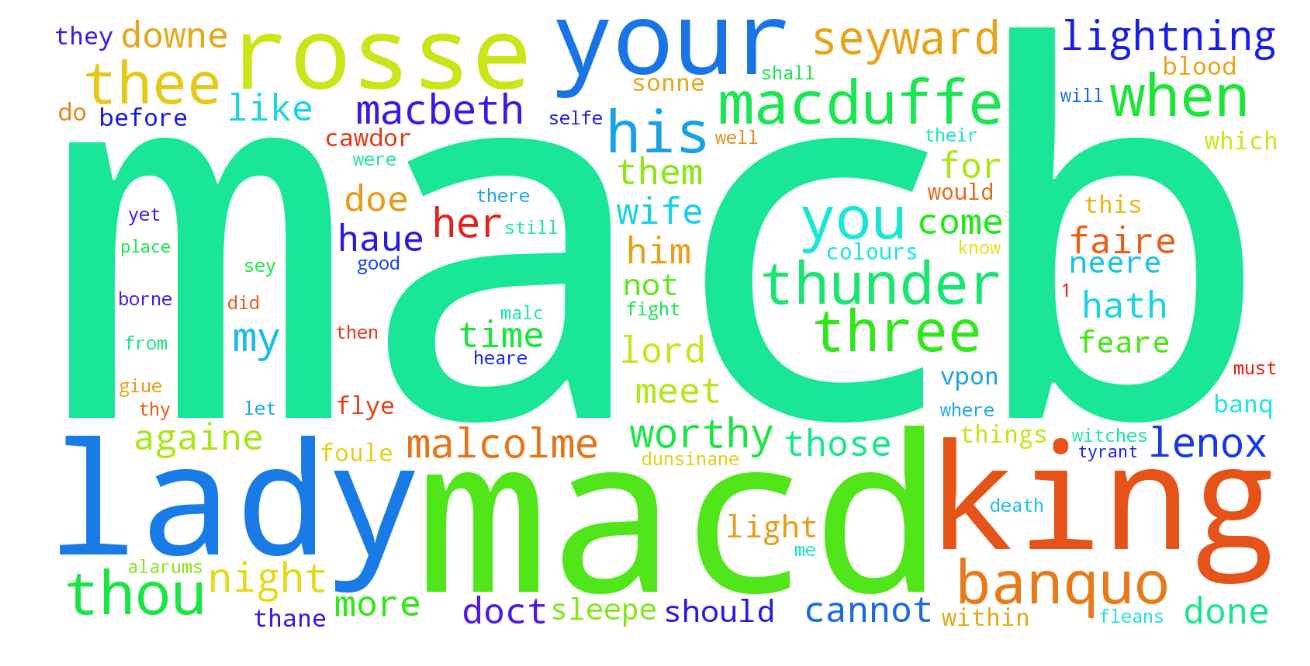

In [22]:
# visualise most relevance words
tmt.visualisation.plot_wordcloud(words_by_relevance)